In [1]:
import collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import forestci as fci

Failed to import duecredit due to No module named 'duecredit'


In [2]:
signal = pd.read_csv("resonances0.txt", delim_whitespace=True)
test_data = pd.read_csv("test.txt", delim_whitespace=True)
val_data = pd.read_csv("comp.txt", delim_whitespace=True)
test_data = test_data[['Z','A']]
signal.shape

(283, 12)

In [3]:
# Odd-Odd / Odd-Even / Even-Odd
o2filter = signal[signal['Z'] % 2 != 0] # Selecting Odd-X data
ofilter = signal[signal['A'] % 2 != 0] # Selecting X-Odd data
ofilter = ofilter.append(o2filter)

x = ofilter[['Z','A']]
y = ofilter[['D0']] # Reshaping data
arr_x = x.values.reshape(-1,2)
arr_y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(arr_x, arr_y, test_size=0.2, random_state=11) # Splitting data into 80% training and 20% testing

rfo = RandomForestRegressor(n_estimators=500,max_depth=500,random_state=10,max_features=2) # Building RF
rfo.fit(X_train,y_train)
print(rfo.score(X_train,y_train))

y_pred = rfo.predict(X_test)

rf_err = abs(fci.random_forest_error(rfo,X_train,X_test,calibrate=False)) # RF Errors


o2_data = test_data[test_data['Z'] % 2 != 0] # Unknown Data from Odd-X
o_data = test_data[test_data['A'] % 2 != 0] # Unknown Data from X-Odd
o_data = o_data.append(o2_data) # Joining the two lists
o_data = o_data.values.reshape(-1,2)
yo_pred = rfo.predict(o_data) # Uknown data predicitons
rfo_err = abs(fci.random_forest_error(rfo,ofilter,o_data,calibrate=False)) # Unknown data errors

print(o_data)

0.8834516176075087
[[23 49]
 [25 51]
 [27 55]
 [29 57]
 [29 59]
 [29 61]
 [29 63]
 [31 63]
 [31 65]
 [31 67]
 [33 69]
 [33 71]
 [33 73]
 [39 83]
 [39 87]
 [23 49]
 [25 51]
 [27 55]
 [29 57]
 [29 59]
 [29 60]
 [29 61]
 [29 63]
 [31 63]
 [31 65]
 [31 67]
 [33 69]
 [33 71]
 [33 73]
 [39 83]
 [39 87]]


In [4]:
o2_data = test_data[test_data['Z'] % 2 != 0]
o_data = test_data[test_data['A'] % 2 != 0]
o_data = o_data.append(o2_data)
o_data = o_data.values.reshape(-1,2)

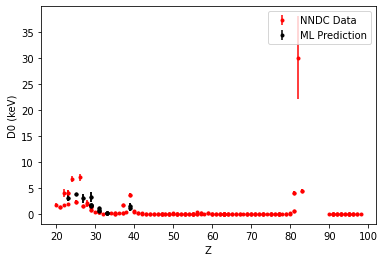

In [5]:
# Plotting

plt.errorbar(ofilter['Z'],ofilter['D0'],yerr=ofilter['dD'],fmt='o',markersize=3, color='red',label='NNDC Data')
#plt.errorbar(X_test[:,0],y_pred,yerr=np.sqrt(rf_err),fmt='o',markersize=3, color='blue',label='Test Prediction')
plt.errorbar(o_data[:,0],yo_pred,yerr=np.sqrt(rfo_err),fmt='o',markersize=3, color='black',label='ML Prediction')

#plt.fill_between(X_test[:,0], y_pred - np.sqrt(rf_err), y_pred + np.sqrt(rf_err), alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF',label='ML Error')
#plt.scatter(X_test[:,0],y_pred,s=3,label='ML Prediction')

#plt.xlim(21,41)
#plt.ylim(-5,80)

plt.legend()
plt.xlabel("Z")
plt.ylabel("D0 (keV)")
plt.show()

In [6]:
with open("data_odd.txt","w") as f:
    # f.write(' Z=  22 A=  46\n')
    # f.write('  U[MeV]  fE1[mb/MeV]\n')
    for i in range(0, len(y_pred)):
        f.write("{0}   {1}   {2}   {3}\n".format(X_test[i,0],X_test[i,1],round(y_pred[i],4),round(np.sqrt(rf_err[i]),4)))

In [7]:
with open("data_odd_test.txt","w") as f:
    # f.write(' Z=  22 A=  46\n')
    # f.write('  U[MeV]  fE1[mb/MeV]\n')
    for i in range(0, len(yo_pred)):
        f.write("{0}   {1}   {2}   {3}\n".format(o_data[i,0],o_data[i,1],round(yo_pred[i],4),round(np.sqrt(rfo_err[i]),4)))